<a href="https://colab.research.google.com/github/ElhorriAbdelBasset/LinkedIn_dataScience_job_Scrapper/blob/main/Word_Vector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pip install np_utils

In [2]:
import numpy as np
import keras.backend as K
import tensorflow as tf
import operator
from tensorflow import keras
import np_utils

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Reshape, Lambda
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import plot_model
from tensorflow.keras.preprocessing import sequence
from sklearn.metrics.pairwise import cosine_distances

from sklearn.manifold import TSNE
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors as nn
from matplotlib import pylab
import pandas as pd



In [3]:
with open("/content/Dune.txt", "r") as file:
    corpus = file.readlines()
    print(corpus)

corpus = [sentence.replace('\n', ' ') for sentence in corpus[10:5000] if sentence.count(" ") >= 2]
# Remove punctuation in text and fit tokenizer on entire corpus
tokenizer = Tokenizer(filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~\t\n'+"'")
tokenizer.fit_on_texts(corpus)

# Convert text to sequence of integer values
corpus = tokenizer.texts_to_sequences(corpus)

['\n', '\n', 'Table of Contents\n', 'Title Page\n', 'Copyright Page\n', 'Dedication\n', 'Book One - DUNE\n', 'Book Two - MUAD‘DIB\n', 'Book Three - THE PROPHET\n', 'APPENDIXES\n', 'Terminology of the Imperium\n', 'CARTOGRAPHIC NOTES\n', 'Afterword by Brian Herbert\n', 'Books by Frank Herbert\n', 'THE BOOK OF FRANK HERBERT\n', 'DESTINATION: VOID (revised edition)\n', 'DIRECT DESCENT\n', 'THE DOSADI EXPERIMENT\n', 'EYE\n', 'THE EYES OF HEISENBERG\n', 'THE GODMAKERS\n', 'THE GREEN BRAIN\n', 'THE MAKER OF DUNE\n', 'THE SANTAROGA BARRIER\n', 'SOUL CATCHER\n', 'WHIPPING STAR\n', 'THE WHITE PLAGUE\n', 'THE WORLDS OF FRANK HERBERT\n', 'MAN OF TWO WORLDS (with Brian Herbert)\n', 'The Dune Chronicles\n', 'DUNE\n', 'DUNE MESSIAH\n', 'CHILDREN OF DUNE\n', 'GOD EMPEROR OF DUNE\n', 'HERETICS OF DUNE\n', 'CHAPTERHOUSE: DUNE\n', 'Books by Frank Herbert and Bill Ransom\n', 'THE JESUS INCIDENT\n', 'THE LAZARUS EFFECT\n', 'THE ASCENSION FACTOR\n', 'Books edited by Brian Herbert\n', 'THE NOTEBOOKS OF FRAN

In [4]:
n_words = sum(len(s) for s in corpus[20:1000]) # Total number of words in the corpus
Vocab_len = len(tokenizer.word_index) + 1
n_words, Vocab_len

(10994, 6967)

In [5]:
print(list((tokenizer.word_index.items()))[:10])

[('the', 1), ('”', 2), ('of', 3), ('a', 4), ('to', 5), ('and', 6), ('he', 7), ('in', 8), ('said', 9), ('his', 10)]


In [18]:
def generate_data_skipgram(corpus, window_size, V):
    maxlen = window_size * 2
    all_in = []
    all_out = []
    for sentence in corpus:
        L = len(sentence)
        sentence = [0] * window_size + sentence + [0] * window_size
        for index, word in enumerate(sentence):
            p = index - window_size
            n = index + window_size + 1


            labels = []
            for i in range(p, n):
                if i != index and 0 <= i < L:
                  all_in.append(word)
                  all_out.append(to_categorical(sentence[i], V))

    return (np.array(all_in), np.array(all_out))



In [19]:
X_skip, y_skip = generate_data_skipgram(corpus[20:1000], window_size=2, V=Vocab_len)
X_skip.shape, y_skip.shape

((41036,), (41036, 6967))

In [20]:
dims = [50]
skipgram_models = []

for dim in dims:

    skipgram = Sequential()

    skipgram.add(Embedding(input_dim=Vocab_len,
                           output_dim=dim,
                           input_length=1,
                           embeddings_initializer='glorot_uniform'))

    skipgram.add(Reshape((dim, )))

    skipgram.add(Dense(Vocab_len, activation='softmax', kernel_initializer='glorot_uniform'))


    # Compile the model with a suitable loss function and select an optimizer.
    # Optimizer Adagrad was used in paper
    skipgram.compile(optimizer=keras.optimizers.Adam(),
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

    skipgram.summary()
    print("")
    skipgram_models.append(skipgram)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 1, 50)             348350    
                                                                 
 reshape (Reshape)           (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 6967)              355317    
                                                                 
Total params: 703667 (2.68 MB)
Trainable params: 703667 (2.68 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________



In [21]:
history_1 = []
for skipgram in skipgram_models:
    history_1.append(skipgram.fit(X_skip, y_skip, batch_size=64, epochs=30, verbose=2))
    print("")

Epoch 1/30
642/642 - 11s - loss: 7.3544 - accuracy: 0.1175 - 11s/epoch - 18ms/step
Epoch 2/30
642/642 - 6s - loss: 6.1507 - accuracy: 0.1206 - 6s/epoch - 9ms/step
Epoch 3/30
642/642 - 6s - loss: 5.9431 - accuracy: 0.1270 - 6s/epoch - 9ms/step
Epoch 4/30
642/642 - 5s - loss: 5.8616 - accuracy: 0.1291 - 5s/epoch - 8ms/step
Epoch 5/30
642/642 - 5s - loss: 5.8053 - accuracy: 0.1337 - 5s/epoch - 8ms/step
Epoch 6/30
642/642 - 5s - loss: 5.7508 - accuracy: 0.1374 - 5s/epoch - 8ms/step
Epoch 7/30
642/642 - 5s - loss: 5.6923 - accuracy: 0.1415 - 5s/epoch - 8ms/step
Epoch 8/30
642/642 - 5s - loss: 5.6265 - accuracy: 0.1450 - 5s/epoch - 8ms/step
Epoch 9/30
642/642 - 5s - loss: 5.5537 - accuracy: 0.1482 - 5s/epoch - 8ms/step
Epoch 10/30
642/642 - 5s - loss: 5.4755 - accuracy: 0.1518 - 5s/epoch - 8ms/step
Epoch 11/30
642/642 - 5s - loss: 5.3943 - accuracy: 0.1553 - 5s/epoch - 8ms/step
Epoch 12/30
642/642 - 5s - loss: 5.3122 - accuracy: 0.1596 - 5s/epoch - 8ms/step
Epoch 13/30
642/642 - 5s - loss: 5

KeyboardInterrupt: ignored

In [6]:
import matplotlib.pyplot as plt

In [23]:
names = ["50 Model"]
for hist,name in zip(history_1, names):
  plt.plot(np.arange(25), hist.history['accuracy'], label=name)
  plt.legend()
  plt.title("Accuracy of three models trained on corpus of 11k words of 7k words vocab with window size of 4")

In [13]:


for skipgram in skipgram_models:
    # Save embeddings for vectors of length 50, 150 and 300 using skipgram model
    weights = skipgram.get_weights()

    # Get the embedding matrix
    embedding = weights[0]

    # Get word embeddings for each word in the vocabulary, write to file
    f = open(f"Vectors_skipgram_window_4_{len(embedding[0])}.txt", "w")

    # Create columns for the words and the values in the matrix, makes it easier to read as dataframe
    columns = ["word"] + [f"value_{i+1}" for i in range(embedding.shape[1])]

    # Start writing to the file, start with the column names
    f.write(" ".join(columns))

    # Start a new line
    f.write("\n")

    for word, i in tokenizer.word_index.items():
        f.write(word)
        f.write(" ")
        f.write(" ".join(map(str, list(embedding[i,:]))))
        f.write("\n")
    f.close()



In [7]:
def generate_data_cbow(corpus, window_size, V):
    maxlen = window_size * 2
    all_in = []
    all_out = []
    for sentence in corpus:
        L = len(sentence)
        sentence = [0] * window_size + sentence + [0] * window_size
        for index, word in enumerate(sentence):
            start = index - window_size
            end = index + window_size + 1


            context_words = []
            for i in range(start, end):
                if i != index:
                    if 0 <= i < L:
                        context_words.append(sentence[i])
                    else:
                        context_words.append(0)

            all_in.append(context_words)
            all_out.append(to_categorical(word, V))

    return (np.array(all_in), np.array(all_out))

In [8]:
window_size=2

X_cbow, y_cbow = generate_data_cbow(corpus, window_size=window_size, V=Vocab_len)
X_cbow.shape, y_cbow.shape

((70988, 4), (70988, 6967))

In [9]:
cbow_models = []
dims = [50]
for dim in dims:
    cbow = Sequential()

    # Add an Embedding layer
    cbow.add(Embedding(input_dim=Vocab_len,
                       output_dim=dim,
                       input_length=window_size*2, # Note that we now have 2L words for each input entry
                       embeddings_initializer='glorot_uniform'))

    cbow.add(Lambda(lambda x: K.mean(x, axis=1), output_shape=(dim, )))

    cbow.add(Dense(Vocab_len, activation='softmax', kernel_initializer='glorot_uniform'))

    cbow.compile(optimizer=keras.optimizers.Adam(),
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

    cbow.summary()
    print("")
    cbow_models.append(cbow)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 4, 50)             348350    
                                                                 
 lambda (Lambda)             (None, 50)                0         
                                                                 
 dense (Dense)               (None, 6967)              355317    
                                                                 
Total params: 703667 (2.68 MB)
Trainable params: 703667 (2.68 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________



In [10]:
history_2 = []
for cbow in cbow_models:
    history_2.append(cbow.fit(X_cbow, y_cbow, batch_size=64, epochs=100, verbose=2))
    print("")

Epoch 1/100
1110/1110 - 30s - loss: 6.0705 - accuracy: 0.2605 - 30s/epoch - 27ms/step
Epoch 2/100
1110/1110 - 10s - loss: 5.3545 - accuracy: 0.2674 - 10s/epoch - 9ms/step
Epoch 3/100
1110/1110 - 10s - loss: 5.1795 - accuracy: 0.2926 - 10s/epoch - 9ms/step
Epoch 4/100
1110/1110 - 9s - loss: 5.0658 - accuracy: 0.2996 - 9s/epoch - 8ms/step
Epoch 5/100
1110/1110 - 10s - loss: 4.9665 - accuracy: 0.3047 - 10s/epoch - 9ms/step
Epoch 6/100
1110/1110 - 9s - loss: 4.8767 - accuracy: 0.3099 - 9s/epoch - 8ms/step
Epoch 7/100
1110/1110 - 10s - loss: 4.7902 - accuracy: 0.3156 - 10s/epoch - 9ms/step
Epoch 8/100
1110/1110 - 10s - loss: 4.7034 - accuracy: 0.3195 - 10s/epoch - 9ms/step
Epoch 9/100
1110/1110 - 10s - loss: 4.6164 - accuracy: 0.3240 - 10s/epoch - 9ms/step
Epoch 10/100
1110/1110 - 9s - loss: 4.5303 - accuracy: 0.3288 - 9s/epoch - 8ms/step
Epoch 11/100
1110/1110 - 10s - loss: 4.4464 - accuracy: 0.3344 - 10s/epoch - 9ms/step
Epoch 12/100
1110/1110 - 10s - loss: 4.3641 - accuracy: 0.3410 - 10s

In [14]:
for cbow in cbow_models:
    # Save embeddings for vectors of length 50, 150 and 300 using cbow model
    weights = cbow.get_weights()

    # Get the embedding matrix
    embedding = weights[0]

    # Get word embeddings for each word in the vocabulary, write to file
    f = open(f'vectors_cbow_window_2_{len(embedding[0])}.txt', 'w')

    # Create columns for the words and the values in the matrix, makes it easier to read as dataframe
    columns = ["word"] + [f"value_{i+1}" for i in range(embedding.shape[1])]

    # Start writing to the file, start with the column names
    f.write(" ".join(columns))
    f.write("\n")

    for word, i in tokenizer.word_index.items():
        f.write(word)
        f.write(" ")
        f.write(" ".join(map(str, list(embedding[i,:]))))
        f.write("\n")
    f.close()


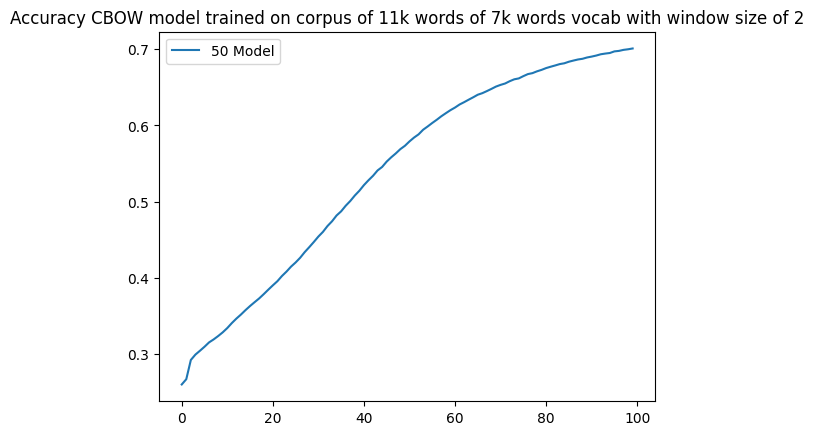

In [16]:
names = ["50 Model"]
for hist,name in zip(history_2, names):
  plt.plot(np.arange(100), hist.history['accuracy'], label=name)
  plt.legend()
  plt.title("Accuracy CBOW model trained on corpus of 11k words of 7k words vocab with window size of 2")

In [26]:
def get_embed(word, embedding, vocab_size=Vocab_len, tokenizer=tokenizer):
    """ Embed a word by getting the one hot encoding and taking the dot product of this vector with the
        embedding matrix 'word' = string type
    """
    # get the index of the word from the tokenizer, i.e. convert the string to it's corresponding integer in the vocabulary
    int_word = tokenizer.texts_to_sequences([word])[0]
    # get the one-hot encoding of the word
    bin_word = to_categorical(int_word, vocab_size)
    return np.dot(bin_word, embedding)

In [66]:
def compute_distance(word_a, word_b, word_c, word_d):
    """ Returns the cosine distance between the predicted and the true word (word_d)

    Our analogy function is: 'word_a is to word_b as word_c is to ?'
    Here, ? is predicted based on the embeddings. Then, we compare ? to word_d, which is the true word.
    """
    models = cbow_models
    embeddings = [model.get_weights()[0] for model in models]
    for embedding in embeddings:
        predicted_embedding = get_embed(word_b, embedding) - get_embed(word_a, embedding) + get_embed(word_c, embedding)

        dist_exp_true = cosine_distances(predicted_embedding, get_embed(word_d, embedding))
        print(dist_exp_true[0][0])

In [69]:
compute_distance('Paul', 'Atreides', 'feyd-rautha', 'harkonnen')

0.9795865


In [84]:
from scipy.spatial.distance import cosine, cdist


def embed(word, embedding, vocab_size=Vocab_len, tokenizer=tokenizer):
    # Get the index of the word from the tokenizer, i.e. convert the string to it's corresponding integer in the vocabulary
    int_word = tokenizer.texts_to_sequences([word])[0]
    # Get the one-hot encoding of the word
    bin_word = to_categorical(int_word, vocab_size)
    return np.dot(bin_word, embedding).reshape(-1)


def get_nearest_words(model_name, embed_word, used_words, nr=10):
    """Returns the `nr` nearest words to the `embed_word` for a certain `model_name`
    """
    # Load the model embedding matrix and create a list of all the words
    df = pd.read_csv(f"/content/vectors_cbow_window_2_50.txt", sep=" ")

    # Filter out words that are in the analogy
    df = df[~(df["word"].isin(used_words))]

    # Store the embedded representation of the words
    embedded_words = df.iloc[:, 1:].values
    embedded_word = embed_word.reshape(1, -1)

    # Get the distances between the input embedding and the embedded words such that we can look for the smallest one
    # cdist makes it easy for us to compute the cosine distance between each pair of the two collections of inputs
    distances = cdist(embedded_word, embedded_words, "cosine").reshape(-1)

    # Sort distances and store the indices of the `nr` lowest distances
    top_sorted_indices = distances.argsort()[:nr]

    # Convert the indices to actual words
    top_words = [list(df["word"])[i] for i in top_sorted_indices]

    # Keep the rounded values of those indices
    values = [round(distances[i], 4) for i in top_sorted_indices]
    # Concatenate the top words together with their values and return it as a list
    return list(zip(top_words, values))


def print_analogy(analogy, embeddings, models, model_names, nr=10):
    # Retrieve the words from the analogy we need to compute
    word_a, word_b, word_c, word_true = analogy

    # Formulate the analogy task
    analogy_task = f"{word_a} is to {word_b} as {word_c} is to ?"

    print(f"Analogy Task: {analogy_task}")
    print("---------------------------------------------------")

    # Iterate over all models available
    for model_name, embedding in zip(model_names, embeddings):
        # Obtain embeddings for all the words
        embed_true = embed(word_true, embedding)
        embed_a, embed_b, embed_c = embed(word_a, embedding), embed(word_b, embedding), embed(word_c, embedding)
        print(embed_a.shape, embed_b.shape, embed_c.shape)
        # Obtain the predicted embedding based on the analogy function
        embed_prediction = embed_b - embed_a + embed_c

        # The true word with distance similarity value between predicted embedding and true word embedding,
        # also denoted `sim1` in the text above
        sim1 = round(cosine(embed_true, embed_prediction), 4)

        # The predicted word with distance similarity value between predicted embedding and the embedding of the word
        # in the vocabulary that is closest to this predicted embedding
        word_prediction, sim2 = get_nearest_words(model_name, embed_prediction, [word_a, word_b, word_c], 1)[0]

        # Get the top `nr` nearest words
        nearest_words = get_nearest_words(model_name, embed_prediction, [word_a, word_b, word_c], nr)

        # Print whether or not the true word was in the top nr
        partially_correct = word_true in [word[0] for word in nearest_words]

        print(f"Embedding: {model_name}")
        # Print all top nr words with their distance
        for word in nearest_words:
            print(f"{word[0]} => {round(word[1], 4)}")
        print(f"Predicted: {word_prediction} ({round(sim2, 4)}) - True: {word_true} ({sim1})")
        print(f"Correct? {word_prediction == word_true} - In the top {nr}? {partially_correct}")
        print("---------------------------------------------------")

In [87]:
# Concatenate all models such that we can easily iterate over all models
models = cbow_models

# Store the embeddings of all models such that we can easily iterate over them
word_embeddings = [model.get_weights()[0] for model in models]

# Store the model names such that we can easily iterate over them
model_names = ["cbow_50",]

# Set the number of top words to print
nr = 10

print_analogy(analogy=('Hawat', 'Atreides', 'Piter', 'harkonnen'), embeddings=word_embeddings, models=models, model_names=model_names, nr=nr)


Analogy Task: Hawat is to Atreides as Piter is to ?
---------------------------------------------------
(50,) (50,) (50,)
Embedding: cbow_50
atreides => 0.3219
posted => 0.507
swordmaster => 0.5111
armorial => 0.5177
“observe => 0.5199
fanatics => 0.5252
duke’s => 0.528
sinister => 0.5322
scratch => 0.5398
brilliance => 0.5531
Predicted: atreides (0.3219) - True: harkonnen (1.0488)
Correct? False - In the top 10? False
---------------------------------------------------
